# ISSS609-Text Analytics and Applications Project

There will be a list of workbooks for the purpose of this project.

1) Data_Preparation_and_Topic_Modelling

2) Abstractive_Summarisation

3) Extractive_Summarisation_Average_Score

4) Extractive_Summarisation_TFIDF

5) UI_Preparation

### This workbook will cover (1) Data Preparation and Topic Modelling.

In [2]:
## Import libraries
import pandas as pd
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem.porter import *
import re
import gensim

C:\Users\Wei Jie\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## A. Data Selection

### Do not run it as this is just to split the csv files into txt files as well as to select the samples

In [ ]:
### Dont need to run this
## Read raw data
A1 = pd.read_csv("Raw Data/articles1.csv")
A2 = pd.read_csv("Raw Data/articles2.csv")
A3 = pd.read_csv("Raw Data/articles3.csv")

## Concatenate three csv files
A_ALL = pd.concat([A1, A2, A3], ignore_index=True)

## Delete unnecessary column
del A_ALL["Unnamed: 0"]

## Extract rows of interested pulications
P1 = A_ALL["publication"]== "Washington Post"
P2 = A_ALL["publication"]== "Reuters"
P3 = A_ALL["publication"]== "New York Times"
P4 = A_ALL["publication"]== "Guardian"
ARTICLE = A_ALL[P1|P2|P3|P4]

## Reset index of the new dataframme
ARTICLE.reset_index(drop=True, inplace=True)

ARTICLE.head(10)

In [ ]:
### Dont need to run this
## Extract content and put each into a separate txt file
for i in range(38308):
    title = "{}.txt".format(ARTICLE["id"][i])
    file1 = open(title,"w",encoding='utf-8')
    file1.writelines(ARTICLE["content"][i]) 
    file1.close()

## B. Text Pre processing

In [3]:
#Pre-processing

file_directory = 'Raw Data/News_Content'
filename_pattern = '.+\.txt'
my_corpus = PlaintextCorpusReader(file_directory, filename_pattern)

fids = my_corpus.fileids()
docs1 = []

#tokenisation
for fid in fids:
    doc_raw = my_corpus.raw(fid)
    doc = nltk.word_tokenize(doc_raw)
    docs1.append(doc)

#lowercase
docs2 = [[w.lower() for w in doc] for doc in docs1]

#alphabets
docs3 = [[w for w in doc if re.search('^[a-z]+$', w)] for doc in docs2]

#stopword
stop_list = nltk.corpus.stopwords.words('english')
docs4 = [[w for w in doc if w not in stop_list] for doc in docs3]


#stemming... if not good can try lemmatisation
#stemmer = PorterStemmer()
#docs5 = [[stemmer.stem(w) for w in doc] for doc in docs4]


## C. Topic Analysis

### We will mainly use simple LDA model.

### This is to test and get a sense of the underlying topics

In [42]:

#turn into vectors
news_dictionary = gensim.corpora.Dictionary(docs4)
news_vecs = [news_dictionary.doc2bow(doc) for doc in docs4]

#LDA
news_lda = gensim.models.ldamodel.LdaModel(corpus=news_vecs, id2word=news_dictionary, num_topics=10)

#show topic
topics = news_lda.show_topics(10, 15)

for i in range(0, 10):
    print(topics[i])

# Compute Perplexity
print('\nPerplexity: ', news_lda.log_perplexity(news_vecs))  
    
# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=news_lda, texts=docs4, dictionary=news_dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

(0, '0.009*"said" + 0.008*"team" + 0.008*"game" + 0.006*"games" + 0.006*"first" + 0.005*"season" + 0.005*"one" + 0.005*"olympic" + 0.005*"two" + 0.005*"last" + 0.004*"players" + 0.004*"athletes" + 0.004*"sports" + 0.004*"time" + 0.004*"year"')
(1, '0.015*"said" + 0.007*"government" + 0.007*"state" + 0.007*"united" + 0.007*"military" + 0.006*"islamic" + 0.006*"syria" + 0.005*"war" + 0.005*"forces" + 0.005*"states" + 0.004*"would" + 0.004*"european" + 0.004*"country" + 0.004*"minister" + 0.004*"syrian"')
(2, '0.029*"said" + 0.014*"police" + 0.005*"state" + 0.005*"officers" + 0.005*"officials" + 0.005*"people" + 0.004*"two" + 0.004*"department" + 0.004*"officer" + 0.004*"one" + 0.004*"city" + 0.004*"law" + 0.004*"according" + 0.004*"court" + 0.003*"killed"')
(3, '0.034*"trump" + 0.015*"clinton" + 0.013*"said" + 0.009*"would" + 0.008*"campaign" + 0.008*"republican" + 0.008*"president" + 0.007*"obama" + 0.006*"party" + 0.005*"republicans" + 0.005*"state" + 0.005*"voters" + 0.005*"election" 

### Run 1

We run this to identify the optimal K.

In [7]:
#turn into vectors
news_dictionary = gensim.corpora.Dictionary(docs4)
news_vecs = [news_dictionary.doc2bow(doc) for doc in docs4]

# Topic Analysis to test best number of topic

import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

model_list = []
coherence_values = []
model_topics = []

for num_topics in range(2, 30, 2):
    news_lda_x = gensim.models.ldamodel.LdaModel(corpus=news_vecs, id2word=news_dictionary, num_topics=num_topics)
    coherencemodel = CoherenceModel(model=news_lda_x, texts=docs4, dictionary=news_dictionary, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(news_lda_x)
    coherence_values.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))

print(datetime.datetime.now())


# Show graph

import matplotlib.pyplot as plt

limit=30; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

2019-03-28 20:13:26.948236
#Topics: 2 Score: 0.30838237742694624
#Topics: 4 Score: 0.337095187880874
#Topics: 6 Score: 0.3915860604845108
#Topics: 8 Score: 0.38761739025314157
#Topics: 10 Score: 0.4281452163878116
#Topics: 12 Score: 0.44342010103968876
#Topics: 14 Score: 0.46981381948657186
#Topics: 16 Score: 0.4581560062728701
#Topics: 18 Score: 0.4575190450636555
#Topics: 20 Score: 0.49415462175793223
#Topics: 22 Score: 0.46053821880494716
#Topics: 24 Score: 0.46528496419480775
#Topics: 26 Score: 0.4673442480652363
#Topics: 28 Score: 0.46524332692093184
2019-03-29 05:03:46.855705


<Figure size 640x480 with 1 Axes>

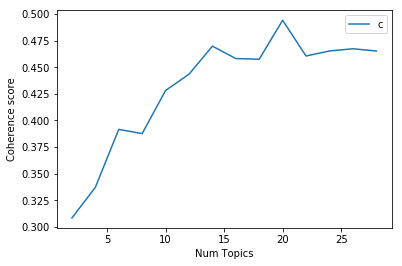

In [15]:
# Show graph

import matplotlib.pyplot as plt

limit=30; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

Dominant Topics were checked per documents in the following chunk

In [18]:
#turn into vectors
news_dictionary = gensim.corpora.Dictionary(docs4)
news_vecs = [news_dictionary.doc2bow(doc) for doc in docs4]

#Find most dominant topic

import numpy as np
import pandas as pd

def format_topics_sentences(ldamodel, corpus, data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(data)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

#I choose model_list[10] where the number of topics is 22
df_topic_sents_keywords = format_topics_sentences(ldamodel=model_list[10], corpus=news_vecs, data=docs4)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.3476,"said, city, water, new, people, one, could, wo...","[plane, crash, killed, supreme, court, justice..."
1,1,4.0,0.2785,"said, trump, president, obama, would, administ...","[tom, hanks, delivered, espresso, machine, whi..."
2,2,0.0,0.5172,"said, united, government, states, state, milit...","[basque, separatist, group, eta, said, giving,..."
3,3,10.0,0.3423,"said, one, like, family, school, new, home, ti...","[utah, high, school, homework, assignment, dir..."
4,4,9.0,0.5979,"trump, clinton, campaign, said, republican, do...","[jeremy, corbyn, performance, british, electio..."
5,5,0.0,0.6872,"said, united, government, states, state, milit...","[suspected, islamic, state, militants, killed,..."
6,6,1.0,0.5960,"company, said, new, companies, google, also, a...","[design, feature, could, potentially, allow, e..."
7,7,4.0,0.5334,"said, trump, president, obama, would, administ...","[awkward, question, begun, nag, opponents, don..."
8,8,2.0,0.3436,"like, people, one, even, women, think, know, m...","[late, graduate, student, oxford, bought, volu..."
9,9,1.0,0.3623,"company, said, new, companies, google, also, a...","[important, stories, published, guardian, come..."


We proceed to save the models so as to do further investigation and determine which optimal k to use.

In [16]:
#Save a model to disk, or reload a pre-trained model
news_lda=model_list[6]

news_lda.save("news_lda_14Topics")

lda_disk=gensim.models.ldamodel.LdaModel.load("news_lda_14Topics")

In [17]:
#Code to save theta
import pandas as pd

mixture = [dict(news_lda[x]) for x in news_vecs]
pd.DataFrame(mixture).to_csv("doc_topic_mixture_14Topics.csv")

# Write code here to save top 10 words for each topic (beta)
top_words_per_topic = []
for t in range(news_lda.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in news_lda.show_topic(t, topn = 10)])

pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words_14Topics.csv")


### Run 2 with more stopwords

We realised that there are some noisy words in Run 1 results. Hence, we decide to add those identified noisy words and re-run the LDA model.

In [12]:
## Rerun topic analysis with new stop words list

stop_list = nltk.corpus.stopwords.words('english')
stop_list += ['would', 'said','could','also','like','year', 'day', 'first', 'last', 'one', 'two', 'people', 'told', 'new','even']
docs6 = [[w for w in doc if w not in stop_list] for doc in docs3]

In [13]:
#turn into vectors
news_dictionary2 = gensim.corpora.Dictionary(docs6)
news_vecs2 = [news_dictionary2.doc2bow(doc) for doc in docs6]

In [14]:
print(news_vecs2[10])

[(11, 4), (27, 1), (36, 1), (53, 1), (65, 1), (125, 2), (126, 2), (128, 1), (163, 1), (194, 2), (198, 1), (241, 3), (263, 1), (265, 5), (278, 1), (294, 1), (301, 1), (302, 1), (315, 1), (330, 1), (349, 2), (355, 6), (365, 1), (367, 1), (369, 5), (374, 2), (381, 1), (385, 2), (407, 1), (458, 1), (468, 1), (523, 1), (539, 2), (554, 1), (558, 1), (560, 1), (566, 1), (594, 1), (595, 1), (612, 1), (621, 1), (623, 3), (678, 1), (679, 2), (681, 1), (690, 1), (705, 4), (711, 2), (714, 1), (728, 1), (735, 1), (750, 1), (766, 1), (767, 1), (780, 2), (800, 2), (801, 2), (826, 1), (834, 2), (861, 1), (865, 1), (878, 1), (884, 1), (904, 1), (906, 1), (920, 1), (969, 2), (1033, 1), (1043, 1), (1054, 4), (1059, 1), (1061, 1), (1065, 2), (1083, 1), (1092, 1), (1097, 1), (1119, 1), (1152, 1), (1165, 2), (1194, 2), (1199, 1), (1213, 2), (1219, 2), (1242, 2), (1259, 1), (1278, 1), (1293, 1), (1301, 1), (1302, 2), (1320, 1), (1322, 1), (1333, 1), (1338, 1), (1367, 1), (1373, 3), (1376, 1), (1413, 1), (141

2019-03-29 23:16:54.400409
#Topics: 2 Score: 0.42835375733574915
#Topics: 4 Score: 0.46175075541972377
#Topics: 6 Score: 0.47240861151329283
#Topics: 8 Score: 0.4950969714632491
#Topics: 10 Score: 0.5401124820037313
#Topics: 12 Score: 0.517149586135673
#Topics: 14 Score: 0.5269325730403149
#Topics: 16 Score: 0.52547185903946
#Topics: 18 Score: 0.5439942850146383
#Topics: 20 Score: 0.5544944976851554
#Topics: 22 Score: 0.5720617103707937
#Topics: 24 Score: 0.5394641364744482
#Topics: 26 Score: 0.5367838548616745
#Topics: 28 Score: 0.5747323549391258
2019-03-30 08:27:53.296866


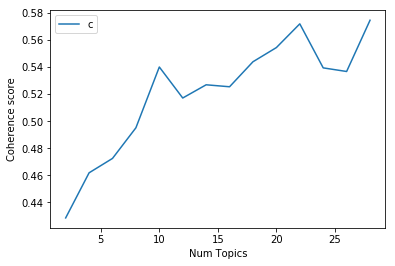

In [33]:
# Topic Analysis to test best number of topic

import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

model_list2 = []
coherence_values2 = []
model_topics2 = []

for num_topics in range(2, 30, 2):
    news_lda_x2 = gensim.models.ldamodel.LdaModel(corpus=news_vecs2, id2word=news_dictionary2, num_topics=num_topics)
    coherencemodel2 = CoherenceModel(model=news_lda_x2, texts=docs6, dictionary=news_dictionary2, coherence='c_v')
    model_topics2.append(num_topics)
    model_list2.append(news_lda_x2)
    coherence_values2.append(coherencemodel2.get_coherence())
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel2.get_coherence()))

print(datetime.datetime.now())


# Show graph

import matplotlib.pyplot as plt

limit=30; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values2)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values2"), loc='best')
plt.show()

In [ ]:
#Find most dominant topic

import numpy as np
import pandas as pd

def format_topics_sentences(ldamodel, corpus, data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(data)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

#I choose model_list[10] where the number of topics is 22
df_topic_sents_keywords2 = format_topics_sentences(ldamodel=model_list2[10], corpus=news_vecs2, data=docs6)

# Format
df_dominant_topic2 = df_topic_sents_keywords2.reset_index()
df_dominant_topic2.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic2.head(10)

In [44]:
#Save a model to disk, or reload a pre-trained model
news_lda2=model_list2[10]

news_lda2.save("news_lda_round2_22Topics") 

In [45]:
#Code to save theta
import pandas as pd

mixture = [dict(news_lda2[x]) for x in news_vecs2]
pd.DataFrame(mixture).to_csv("doc_topic_mixture_round2_22Topics.csv")

# Write code here to save top 10 words for each topic (beta)
top_words_per_topic2 = []
for t in range(news_lda2.num_topics):
    top_words_per_topic2.extend([(t, ) + x for x in news_lda2.show_topic(t, topn = 10)])

pd.DataFrame(top_words_per_topic2, columns=['Topic', 'Word', 'P']).to_csv("top_words_round2_22Topics.csv")

In [47]:
#show topic
topics2 = news_lda2.show_topics(22, 10)

for i in range(0, 22):
    print(topics2[i])

# Compute Perplexity
print('\nPerplexity: ', news_lda2.log_perplexity(news_vecs2))  

(0, '0.012*"team" + 0.011*"game" + 0.008*"games" + 0.007*"olympic" + 0.006*"players" + 0.006*"athletes" + 0.006*"season" + 0.006*"sports" + 0.005*"rio" + 0.004*"olympics"')
(1, '0.013*"trump" + 0.011*"news" + 0.008*"russia" + 0.007*"russian" + 0.006*"clinton" + 0.006*"information" + 0.006*"investigation" + 0.005*"campaign" + 0.005*"media" + 0.005*"officials"')
(2, '0.013*"state" + 0.012*"syria" + 0.010*"united" + 0.009*"islamic" + 0.009*"russia" + 0.009*"military" + 0.008*"forces" + 0.008*"government" + 0.008*"war" + 0.008*"syrian"')
(3, '0.009*"show" + 0.006*"music" + 0.005*"film" + 0.004*"time" + 0.004*"movie" + 0.004*"ali" + 0.003*"years" + 0.003*"night" + 0.003*"star" + 0.003*"hollywood"')
(4, '0.017*"city" + 0.006*"york" + 0.005*"state" + 0.005*"park" + 0.005*"residents" + 0.004*"many" + 0.004*"home" + 0.004*"area" + 0.004*"local" + 0.004*"town"')
(5, '0.016*"obama" + 0.014*"president" + 0.013*"trump" + 0.013*"china" + 0.012*"united" + 0.010*"administration" + 0.010*"north" + 0.01

As coherence score does not provide a clear cut optimal k, we plan to use two other evaluation methods.

1) Human Evaluation (not shown here)

2) Perplexity value (as seen below)

In [57]:
perplexity_values2 = []


for i in range(0,14,1):
    news_lda2=model_list2[i]
    perplexitymodel2 = news_lda2.log_perplexity(news_vecs2)

    perplexity_values2.append(perplexitymodel2)
     
    print("#Topics: " + str((i+1)*2) + " Score: " + str(perplexitymodel2))

print(datetime.datetime.now())

#Topics: 2 Score: -8.991948534703338
#Topics: 4 Score: -8.898641294447147
#Topics: 6 Score: -8.867867601629621
#Topics: 8 Score: -8.819079537794552
#Topics: 10 Score: -8.815217310659635
#Topics: 12 Score: -8.795627674630861
#Topics: 14 Score: -8.796205016066839
#Topics: 16 Score: -8.794180768151254
#Topics: 18 Score: -8.789330038424467
#Topics: 20 Score: -8.77651033035329
#Topics: 22 Score: -8.782273121276807
#Topics: 24 Score: -8.800883124313913
#Topics: 26 Score: -8.801505447664736
#Topics: 28 Score: -8.79928098763469


IndexError: list index out of range

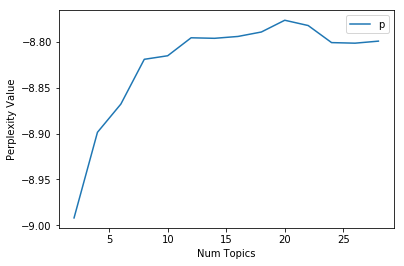

In [58]:
# Show graph

import matplotlib.pyplot as plt

limit=30; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, perplexity_values2)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity Value")
plt.legend(("perplexity_values2"), loc='best')
plt.show()

In [18]:
lda_disk=gensim.models.ldamodel.LdaModel.load("news_lda_round2_22Topics")

#Find most dominant topic

import numpy as np
import pandas as pd

def format_topics_sentences(ldamodel, corpus, data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(data)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

#I choose model_list[10] where the number of topics is 22
df_topic_sents_keywords2 = format_topics_sentences(ldamodel=lda_disk, corpus=news_vecs2, data=docs6)

# Format
df_dominant_topic2 = df_topic_sents_keywords2.reset_index()
df_dominant_topic2.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic2.head(22)



,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,18.0,0.2890,"court, case, justice, judge, law, former, fede...","[plane, crash, killed, supreme, court, justice..."
1,1,6.0,0.2206,"food, restaurant, eat, coffee, chicken, restau...","[tom, hanks, delivered, espresso, machine, whi..."
2,2,6.0,0.2264,"food, restaurant, eat, coffee, chicken, restau...","[basque, separatist, group, eta, giving, pisto..."
3,3,12.0,0.4036,"women, know, time, think, way, get, want, much...","[utah, high, school, homework, assignment, dir..."
4,4,19.0,0.3903,"trump, clinton, campaign, republican, presiden...","[jeremy, corbyn, performance, british, electio..."
5,5,14.0,0.4461,"attack, attacks, islamic, state, killed, turke...","[suspected, islamic, state, militants, killed,..."
6,6,16.0,0.6805,"company, facebook, google, apple, internet, on...","[design, feature, potentially, allow, encrypte..."
7,7,21.0,0.3524,"states, law, federal, state, united, governmen...","[awkward, question, begun, nag, opponents, don..."
8,8,12.0,0.3947,"women, know, time, think, way, get, want, much...","[late, graduate, student, oxford, bought, volu..."
9,9,16.0,0.6139,"company, facebook, google, apple, internet, on...","[important, stories, published, guardian, come..."


In [21]:
#number of documents for each topic
topic_counts2 = df_topic_sents_keywords2['Dominant_Topic'].value_counts()

#Percentage of Documents for Each Topic
topic_contribution2 = round(topic_counts2/topic_counts2.sum(),4)

#Topic Number and Keywords
topic_num_keyboards2 = df_topic_sents_keywords2[['Dominant_Topic','Topic_Keywords']]

#Concatenate Column wise
df_dominant_topicv2 = pd.concat([topic_num_keyboards2, topic_counts2, topic_contribution2], axis = 1)

df_dominant_topicv2.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

df_dominant_topicv2.head(10)

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,18.0,"court, case, justice, judge, law, former, fede...",1702.0,0.0444
1,6.0,"food, restaurant, eat, coffee, chicken, restau...",2168.0,0.0566
2,6.0,"food, restaurant, eat, coffee, chicken, restau...",1901.0,0.0496
3,12.0,"women, know, time, think, way, get, want, much...",1343.0,0.0351
4,19.0,"trump, clinton, campaign, republican, presiden...",1048.0,0.0274
5,14.0,"attack, attacks, islamic, state, killed, turke...",1561.0,0.0408
6,16.0,"company, facebook, google, apple, internet, on...",451.0,0.0118
7,21.0,"states, law, federal, state, united, governmen...",1603.0,0.0419
8,12.0,"women, know, time, think, way, get, want, much...",5091.0,0.1330
9,16.0,"company, facebook, google, apple, internet, on...",1240.0,0.0324


### Visualisation tool to plot and analysis the topics

In [17]:
#plotting
lda_disk=gensim.models.ldamodel.LdaModel.load("news_lda_round2_10Topics")
import pyLDAvis
import pyLDAvis.gensim
 

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_disk, news_vecs2, news_dictionary2)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.096553  0.012741       1        1  23.352995
2      0.080285  0.095423       2        1  18.024378
9     -0.118740  0.007377       3        1  11.864712
7     -0.012392  0.146241       4        1  11.456938
4     -0.150622 -0.053284       5        1   9.998020
1     -0.090776 -0.109318       6        1   8.510479
0      0.143289  0.031421       7        1   6.055040
3     -0.001589  0.093993       8        1   5.813066
8      0.135273 -0.039666       9        1   2.687366
6      0.111824 -0.184927      10        1   2.236995, topic_info=      Category           Freq         Term          Total  loglift  logprob
term                                                                       
355    Default  152788.000000        trump  152788.000000  30.0000  30.0000
257    Default   50635.000000      clinton   50635.000000  29.0000  29.0000
6845   Default   40077.000000      percent   40077.000000  28.0000  28.0000
156    Default   24445.000000       police   24445.000000  27.0000  27.0000
45     Default   27277.000000      company   27277.000000  26.0000  26.0000
2820   Default   24586.000000   republican   24586.000000  25.0000  25.0000
921    Default   34395.000000     campaign   34395.000000  24.0000  24.0000
1406   Default    9450.000000     european    9450.000000  23.0000  23.0000
1224   Default   17203.000000     military   17203.000000  22.0000  22.0000
3903   Default   17544.000000       russia   17544.000000  21.0000  21.0000
2487   Default   13895.000000         team   13895.000000  20.0000  20.0000
1242   Default   33064.000000        obama   33064.000000  19.0000  19.0000
1320   Default   38614.000000       united   38614.000000  18.0000  18.0000
1197   Default   12394.000000      islamic   12394.000000  17.0000  17.0000
163    Default   50745.000000    president   50745.000000  16.0000  16.0000
367    Default   27887.000000        world   27887.000000  15.0000  15.0000
3423   Default   12445.000000       health   12445.000000  14.0000  14.0000
1301   Default   10571.000000        syria   10571.000000  13.0000  13.0000
1112   Default   17404.000000        china   17404.000000  12.0000  12.0000
2821   Default   15246.000000  republicans   15246.000000  11.0000  11.0000
4609   Default   14430.000000    companies   14430.000000  10.0000  10.0000
465    Default    7602.000000       europe    7602.000000   9.0000   9.0000
498    Default   34680.000000   government   34680.000000   8.0000   8.0000
1055   Default   14632.000000       voters   14632.000000   7.0000   7.0000
3237   Default   12294.000000      russian   12294.000000   6.0000   6.0000
947    Default   19414.000000     election   19414.000000   5.0000   5.0000
201    Default   48022.000000        state   48022.000000   4.0000   4.0000
1293   Default   43421.000000       states   43421.000000   3.0000   3.0000
2742   Default   12129.000000     economic   12129.000000   2.0000   2.0000
4362   Default    6932.000000      britain    6932.000000   1.0000   1.0000
...        ...            ...          ...            ...      ...      ...
3179   Topic10    1729.164551       doping    1953.209229   3.6782  -5.4611
7586   Topic10    1900.797729        italy    2167.384033   3.6688  -5.3665
38003  Topic10    1100.463135        comet    1235.468262   3.6843  -5.9130
30233  Topic10     311.283783   astronauts     323.500305   3.7615  -7.1758
527    Topic10    1626.430298      italian    2058.922363   3.5642  -5.5224
1406   Topic10    5967.712891     european    9450.035156   3.3404  -4.2224
31392  Topic10     672.412964       boeing     817.526611   3.6046  -6.4057
485    Topic10    3208.353271       france    5060.009766   3.3444  -4.8430
15323  Topic10     671.949890        orbit     842.971619   3.5733  -6.4063
21786  Topic10     403.665588      austria     460.166046   3.6690  -6.9159
488    Topic10    2814.304199       frenc

In [22]:
#plotting
lda_disk=gensim.models.ldamodel.LdaModel.load("news_lda_round2_22Topics")
import pyLDAvis
import pyLDAvis.gensim
 

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_disk, news_vecs2, news_dictionary2)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
19     0.082833  0.042230       1        1  13.290137
12    -0.140950  0.021435       2        1  11.600912
8      0.072845  0.160761       3        1   9.189375
1      0.125991 -0.045327       4        1   5.665529
15     0.004986  0.036012       5        1   4.868206
21     0.144516 -0.007622       6        1   4.505399
9     -0.092196 -0.070172       7        1   4.475708
2      0.145704 -0.034078       8        1   4.392930
5      0.168607 -0.024236       9        1   4.237623
7      0.036354 -0.181088      10        1   3.730872
0     -0.122744  0.023707      11        1   3.723182
20    -0.222094  0.003864      12        1   3.505184
18     0.158870 -0.038290      13        1   3.473328
3     -0.162798 -0.021985      14        1   3.439079
11    -0.010611  0.100719      15        1   3.327324
10     0.109202  0.106365      16        1   3.165522
4     -0.035511 -0.022463      17        1   3.145629
14     0.030568 -0.172358      18        1   3.140832
16    -0.060473  0.066183      19        1   2.760227
17    -0.086098 -0.128585      20        1   1.951101
6     -0.151961  0.026630      21        1   1.572430
13     0.004960  0.158298      22        1   0.839478, topic_info=      Category           Freq            Term          Total  loglift  logprob
term                                                                          
355    Default  145425.000000           trump  145425.000000  30.0000  30.0000
257    Default   47479.000000         clinton   47479.000000  29.0000  29.0000
156    Default   24287.000000          police   24287.000000  28.0000  28.0000
57     Default   20342.000000           court   20342.000000  27.0000  27.0000
1242   Default   33596.000000           obama   33596.000000  26.0000  26.0000
6845   Default   40667.000000         percent   40667.000000  25.0000  25.0000
45     Default   29210.000000         company   29210.000000  24.0000  24.0000
201    Default   48684.000000           state   48684.000000  23.0000  23.0000
163    Default   51000.000000       president   51000.000000  22.0000  22.0000
2820   Default   22743.000000      republican   22743.000000  21.0000  21.0000
705    Default   23411.000000            city   23411.000000  20.0000  20.0000
1112   Default   16917.000000           china   16917.000000  19.0000  19.0000
1293   Default   44695.000000          states   44695.000000  18.0000  18.0000
1320   Default   39870.000000          united   39870.000000  17.0000  17.0000
1406   Default   11220.000000        european   11220.000000  16.0000  16.0000
3903   Default   17164.000000          russia   17164.000000  15.0000  15.0000
1676   Default   20835.000000             law   20835.000000  14.0000  14.0000
921    Default   33037.000000        campaign   33037.000000  13.0000  13.0000
1224   Default   17142.000000        military   17142.000000  12.0000  12.0000
1013   Default   22922.000000           party   22922.000000  11.0000  11.0000
1301   Default   10902.000000           syria   10902.000000  10.0000  10.0000
1197   Default   11682.000000         islamic   11682.000000   9.0000   9.0000
240    Default   19215.000000  administration   19215.000000   8.0000   8.0000
1375   Default   13780.000000          change   13780.000000   7.0000   7.0000
498    Default   34722.000000      government   34722.000000   6.0000   6.0000
2967   Default   20481.000000         federal   20481.000000   5.0000   5.0000
4362   Default    8610.000000         britain    8610.000000   4.0000   4.0000
2821   Default   14010.000000     republicans   14010.000000   3.0000   3.0000
1591   Default    5708.000000         climate    5708.000000   2.0000   2.0000
3133   Default   12474.000000            vote   12474.000000   1.0000   1.0000
...        ...            ...             ...            ...      ...      ...
17541  Topic22     445.808807        hollande     530.